<a href="https://colab.research.google.com/github/Kovibordy/nero/blob/main/Lab_6(demo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Вариант 13

Тема: алгебраический метод обучения радиально-базисной нейронной сети
 Требуется:
 1. Выбрать структуру нейронной сети (количество нейронов и их параметры)
 2. Сформировать обучающую выборку
 3. Алгеобраическим методом вычислить весовые коэффициенты радиальных нейронов
 4. Построить аппроксимирующую функцию и сравнить с заданной (подстроить на одном графике)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Определяем исходную функцию и параметры

In [2]:
def target_function(x):
    return 0.5 / (1 + np.exp(-5 * x))

Интервал для построения функции

In [3]:
x_interval = [-1, 1]

Формирование обучающей выборки

In [4]:
x_train = np.linspace(x_interval[0], x_interval[1], 20)  # 20 точек на интервале [-1, 1]
y_train = target_function(x_train)  # Вычисляем значения функции в точках x_train

Задаем параметры RBF нейронной сети

In [12]:
n_neurons = 30  # Количество нейронов в скрытом слое
centers = np.linspace(x_interval[0], x_interval[1], n_neurons)  # Центры для RBF
sigma = (centers[1] - centers[0]) / np.sqrt(2)  # Ширина гауссовых функций

Формируем матрицу Phi для обучающей выборки

In [6]:
# Каждая строка соответствует входу, каждый столбец - активации нейронов в скрытом слое
Phi = np.exp(-((x_train[:, None] - centers) ** 2) / (2 * sigma ** 2))

Вычисление весов W с помощью псевдообратной матрицы

In [7]:
W = np.linalg.pinv(Phi) @ y_train  # Псевдообратная матрица для расчета весов

Аппроксимация функции на новых данных

In [8]:
# Создаем более плотные данные для построения графика аппроксимации
x_test = np.linspace(x_interval[0], x_interval[1], 100)  # Тестовые точки
Phi_test = np.exp(-((x_test[:, None] - centers) ** 2) / (2 * sigma ** 2))  # Phi для тестовых данных
y_pred = Phi_test @ W  # Значения аппроксимирующей функции

Визуализация результатов

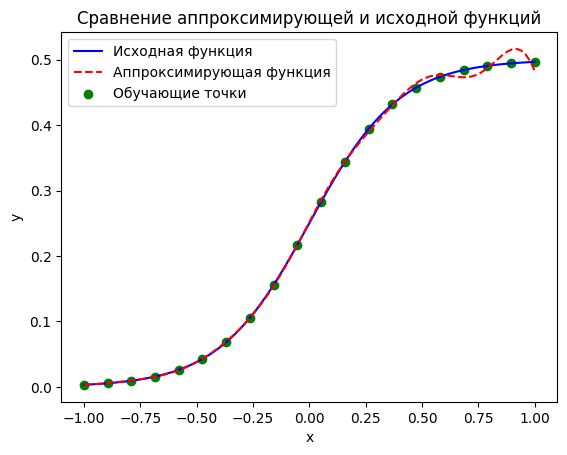

In [13]:
plt.plot(x_test, target_function(x_test), label="Исходная функция", color="blue")
plt.plot(x_test, y_pred, label="Аппроксимирующая функция", color="red", linestyle="--")
plt.scatter(x_train, y_train, color="green", label="Обучающие точки")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Сравнение аппроксимирующей и исходной функций")
plt.show()